In [1]:
import gym
from tqdm import tqdm
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import cv2
from gym.envs.toy_text.frozen_lake import generate_random_map
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning, PolicyIterationModified
from hiive.mdptoolbox.example import forest

In [2]:
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
save_folder = "../images/frozen_lake/"

In [4]:
# map_ = generate_random_map(size=size, p=0.90)
map_ = ["SFFHF","FHFFF","FFFFH","FFFFF","FHFFG"]
fl_env = gym.make("FrozenLake-v1", desc=map_, is_slippery = True,mode="rgb_array")
fl_env.reset()
fl_image = fl_env.render()


In [5]:
cv2.imwrite(save_folder+"fl_env.png",fl_image[:,:,[2,1,0]])

True

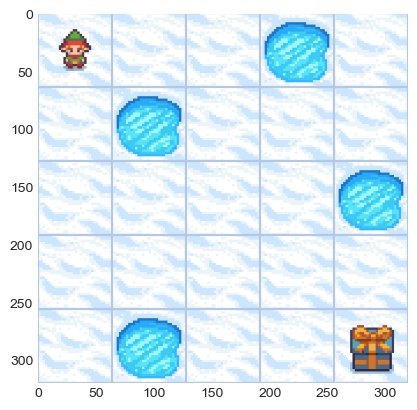

In [6]:
plt.imshow(fl_image)
plt.grid()

In [7]:
fl_env_human = gym.make("FrozenLake-v1", desc=map_, is_slippery = True,render_mode="human")
# fl_env.reset()

In [349]:


# print(fl_env.desc)
# states = fl_env.observation_space.n
# actions = fl_env.action_space.n

# trans = np.zeros((actions, states, states))
# rewards = np.zeros((states, actions))
# for state in range(states):
#     for action in range(actions):
#         for result in fl_env.env.P[state][action]:
#             next_state = result[1]
#             prob = result[0]
#             reward = result[2]
#             trans[action][state][next_state] += prob
#             rewards[state][action] += reward


In [8]:
states = fl_env.observation_space.n
actions = fl_env.action_space.n

trans = np.zeros((actions, states, states))
rewards = np.zeros((actions, states,states))
for state in range(states):
    for action in range(actions):
        for result in fl_env.env.P[state][action]:
            next_state = result[1]
            prob = result[0]
            reward = result[2]
            trans[action][state][next_state] += prob
            rewards[action][state][next_state] = reward

In [351]:
# gamma = 0.95
# vi = ValueIteration(trans, rewards, gamma)
# vi.run()
# time = vi.time
# meanV = np.mean(vi.V)    
# iters = vi.iter

In [303]:
# pi = PolicyIterationModified(trans, rewards, gamma)
# pi.run()
# time = pi.time
# meanV = np.mean(pi.V)    
# iters = pi.iter


# Policy and value iteration 

In [357]:
size = np.sqrt(states)
vistats = []
pistats = []
max_iter = 1000
gammas = np.arange(0.11, 1.0, 0.04)

for gamma in gammas:
    vi = ValueIteration(trans, rewards, gamma,max_iter=max_iter)
    vi.run()
    time = vi.time
    meanV = np.mean(vi.V)    
    iters = vi.iter
    vistats.append(['VI', size, gamma, time, meanV, iters])
    
    pi = PolicyIteration(trans, rewards, gamma,max_iter=max_iter)
    pi.run()
    time = pi.time
    meanV = np.mean(pi.V)    
    iters = pi.iter
    pistats.append(['PI', size, gamma, time, meanV, iters])

    

    

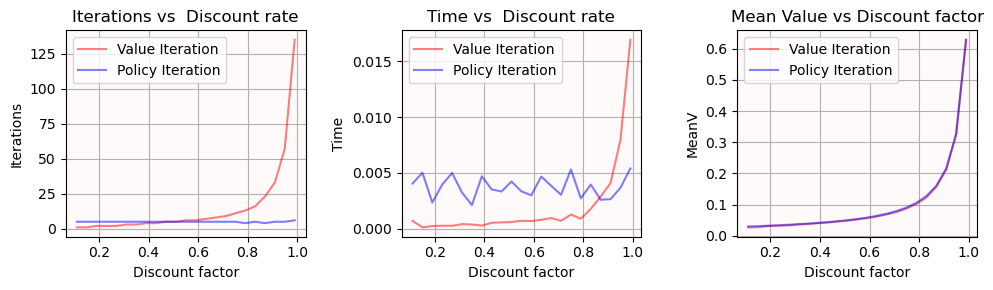

In [358]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Discount factor',  'Time', 'MeanV',  'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Discount factor',  'Time', 'MeanV',  'Iterations'])

sns.lineplot(x=dfvi['Discount factor'], y=dfvi['Iterations'], label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Discount factor'], y=dfpi['Iterations'], label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')

axs[0].set_title('Iterations vs  Discount rate')

sns.lineplot(x=dfvi['Discount factor'], y=dfvi['Time'], label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Discount factor'], y=dfpi['Time'], label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs  Discount rate')

sns.lineplot(x=dfvi['Discount factor'], y=dfvi['MeanV'], label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Discount factor'], y=dfpi['MeanV'], label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('Mean Value vs Discount factor')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.grid()
    ax.set_facecolor("snow")
    
fig.tight_layout()
# fig.savefig(save_folder+"VI_PI_gamma.pdf")

In [428]:
vistats = []
pistats = []

gamma = 0.9999
epsilons = np.arange(0.001,0.1, 0.005)
size = np.sqrt(fl_env.observation_space.n)
for epsilon in epsilons:
    vi = ValueIteration(trans, rewards, gamma, epsilon=epsilon)
    vi.run()
    time = vi.time
    meanV = np.mean(vi.V)    
    iters = vi.iter
    vistats.append(['VI', size, epsilon, time, meanV, iters])


    pi = PolicyIterationModified(trans, rewards, gamma, epsilon=epsilon)
    pi.run()
    time = pi.time
    meanV = np.mean(pi.V)    
    iters = pi.iter
    pistats.append(['PI', size, epsilon, time, meanV, iters])



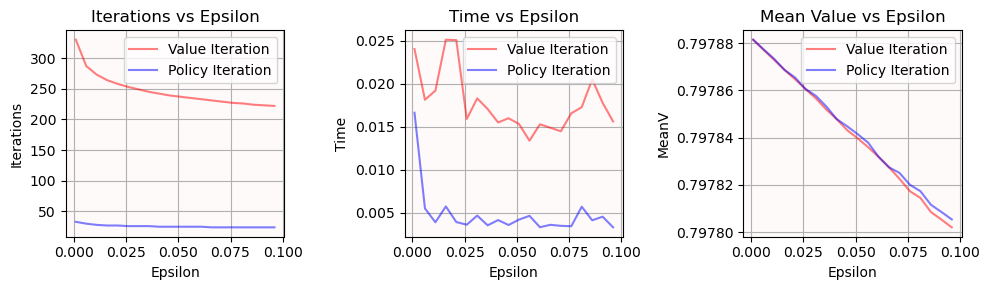

In [429]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MeanV', 'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MeanV', 'Iterations'])

sns.lineplot(x=dfvi['Epsilon'], y=dfvi['Iterations'], label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Epsilon'], y=dfpi['Iterations'], label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
axs[0].set_title('Iterations vs Epsilon')

sns.lineplot(x=dfvi['Epsilon'], y=dfvi['Time'], label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Epsilon'], y=dfpi['Time'], label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs Epsilon')

sns.lineplot(x=dfvi['Epsilon'], y=dfvi['MeanV'], label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(x=dfpi['Epsilon'], y=dfpi['MeanV'], label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('Mean Value vs Epsilon')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.set_facecolor("snow")
    ax.grid()
    ax.ticklabel_format(style='plain', axis='y',useOffset=False)
    
fig.tight_layout()
fig.savefig(save_folder+"VI_PI_epsilon.pdf")

In [430]:
vistats = []
pistats = []

gridsizes = range(5, 50, 1)
gamma = 0.9999
for sz in tqdm(gridsizes):
    rmap = generate_random_map(size=sz, p=0.9)
    env = gym.make("FrozenLake-v1", desc=rmap, is_slippery = True)
    env.reset()

    states = env.observation_space.n
    actions = env.action_space.n

    trans = np.zeros((actions, states, states))
    rewards = np.zeros((actions, states,states))
    for state in range(states):
        for action in range(actions):
            for result in env.env.P[state][action]:
                next_state = result[1]
                prob = result[0]
                reward = result[2]
                trans[action][state][next_state] += prob
                rewards[action][state][next_state] = reward


                
    vi = ValueIteration(trans, rewards, gamma)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', sz, gamma, time, maxV, iters])        

    pi = PolicyIterationModified(trans, rewards, gamma)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', sz, gamma, time, maxV, iters])
  
vistatsdf = pd.DataFrame(vistats, columns=['Type', 'Size', 'Gamma',  'Time', 'maxV', 'Iterations'])
pistatsdf = pd.DataFrame(pistats, columns=['Type', 'Size', 'Gamma',  'Time', 'maxV', 'Iterations'])

100%|██████████| 45/45 [06:22<00:00,  8.50s/it]


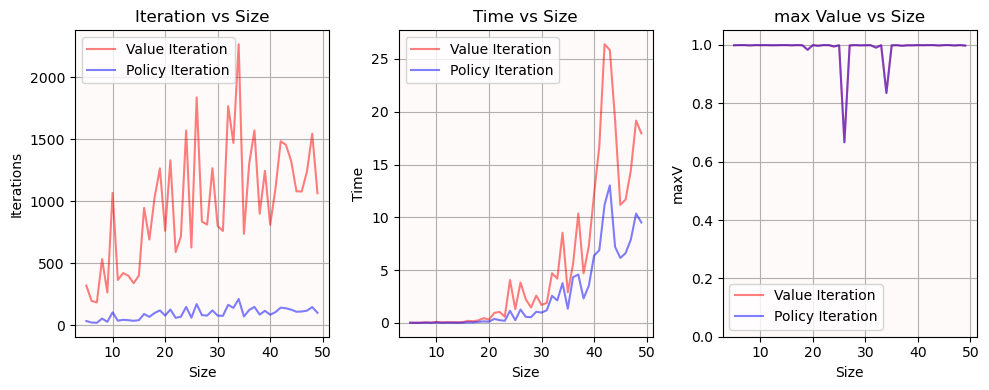

In [433]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

sns.lineplot(x=vistatsdf['Size'], y=vistatsdf['Iterations'], label="Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(x=pistatsdf['Size'], y=pistatsdf['Iterations'], label="Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
axs[0].set_title('Iteration vs Size')

sns.lineplot(x=vistatsdf['Size'], y=vistatsdf['Time'], label="Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(x=pistatsdf['Size'], y=pistatsdf['Time'], label="Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs Size')


sns.lineplot(x=vistatsdf['Size'], y=vistatsdf['maxV'], label="Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(x=pistatsdf['Size'], y=pistatsdf['maxV'], label="Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('max Value vs Size')


for ax in axs.flat:
    ax.legend(loc='best')
    ax.grid()
    ax.set_facecolor("snow")

axs[2].set_ylim([0,1.05])
fig.tight_layout()

In [7]:
fl_env = gym.make("FrozenLake-v1", desc=map_, is_slippery = True,render_mode="rgb_array")
fl_env.reset()
fl_image = fl_env.render()

states = fl_env.observation_space.n
actions = fl_env.action_space.n

trans = np.zeros((actions, states, states))
rewards = np.zeros((actions, states,states))
for state in range(states):
    for action in range(actions):
        for result in fl_env.env.P[state][action]:
            next_state = result[1]
            prob = result[0]
            reward = result[2]
            trans[action][state][next_state] += prob
            rewards[action][state][next_state] = reward

In [69]:
gamma = 0.9999
vi = ValueIteration(trans, rewards, gamma,run_stat_frequency=5)
vi.run()
time = vi.time
meanV = np.mean(vi.V)    
iters = vi.iter

pi = PolicyIteration(trans, rewards, gamma)
pi.run()
pi_time = pi.time

vi_mean_v = [stats["Mean V"] for stats in vi.run_stats]
vi_dQ = [stats["Error"] for stats in vi.run_stats]
vi_rewards_stats = [stats["Reward"] for stats in vi.run_stats]
vi_Iterations = [stats["Iteration"] for stats in vi.run_stats]
vi_time = [stats["Time"] for stats in vi.run_stats]

pi_mean_v = [stats["Mean V"] for stats in pi.run_stats]
pi_dQ = [stats["Error"] for stats in pi.run_stats]
pi_rewards_stats = [stats["Reward"] for stats in pi.run_stats]
pi_Iterations = [stats["Iteration"] for stats in pi.run_stats]
pi_time = [stats["Time"] for stats in pi.run_stats]

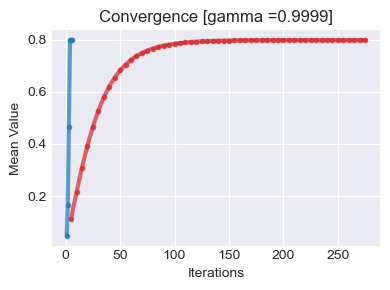

In [70]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(vi_Iterations,vi_mean_v,label="VI",color='tab:red', marker='.',linewidth=3, alpha=0.7)
plt.plot(pi_Iterations,pi_mean_v,label="PI",color='tab:blue',marker='.', linewidth=3, alpha=0.7)
plt.title("Convergence [gamma =0.9999]")
plt.xlabel("Iterations")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.savefig(save_folder+"vi_pi_converence.pdf")



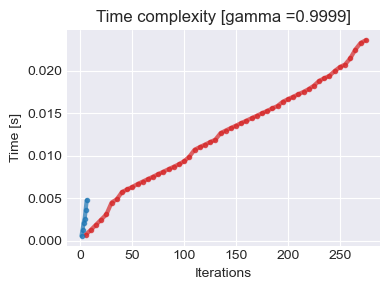

In [72]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(vi_Iterations,vi_time,label="VI",color='tab:red',marker='.', linewidth=3, alpha=0.7)
plt.plot(pi_Iterations,pi_time,label="PI",color='tab:blue',marker='.', linewidth=3, alpha=0.7)
plt.title("Time complexity [gamma =0.9999]")
plt.xlabel("Iterations")
plt.ylabel("Time [s]")
plt.tight_layout()
plt.savefig(save_folder+"vi_pi_time.pdf")

# Q-Learning

In [142]:
# class FrozenLakeAgent(object):
#     def __init__(self):
#         pass

#     def amap_to_gym(self, amap):
#         return gym.make('FrozenLake-v1',is_slippery = False, desc=amap).unwrapped
    
#     def epsilon_gready(self,Q,s,epsilon):
#         if np.random.rand() < epsilon:
#             #take a random action
#             a = np.random.randint(0,4)
#         else:
#             #act gready
#             a = np.argmax(Q[s,:])
#         return a
#     def solve(self, amap, gamma, alpha, epsilon, n_episodes, seed):
#         """Implement the agent"""
#         env = self.amap_to_gym(amap)
#         np.random.seed(seed)
#         # env.seed(seed)
#         # total_steps = 0
#         Q = np.zeros((env.observation_space.n,env.action_space.n))
#         for i in tqdm(range(n_episodes)):
#             s,_ = env.reset() #reset the env, start new episode
#             a = self.epsilon_gready(Q,s,epsilon)
#             Done = False
#             truncate = False
#             steps = 0
#             while not Done or not truncate:
#                 steps +=1
#                 #take action a, observe the next state, and r
#                 s_next,r,Done,truncate,prob_dict = env.step(a)
#                 # epsilon-gready for next action
#                 a_next = self.epsilon_gready(Q,s_next,epsilon)
#                 Q[s,a] += alpha * (r + gamma*Q[s_next,a_next] - Q[s,a])
#                 #update the current states 
#                 s = s_next
#                 a = a_next
#                 if steps ==100: 
#                     break
#         v = np.amax(Q,axis=1)
#         pi = np.argmax(Q,axis=1)
#         policy = ''
        
#         #print(policy)
#         return pi,v

In [144]:
# fl = FrozenLakeAgent()
# pi,v = fl.solve(map_,0.99,0.1,0.99,30000,1)
# np.mean(v)

100%|██████████| 30000/30000 [01:37<00:00, 306.46it/s]


0.18343561725902405

In [57]:
# map_ = generate_random_map(size=size, p=0.90)
map_ = ["SFFHF","FHFFF","FFFFH","FFFFF","FHFFG"]
fl_env = gym.make("FrozenLake-v1", desc=map_, is_slippery = True,render_mode="rgb_array")
fl_env.reset()
fl_image = fl_env.render()

states = fl_env.observation_space.n
actions = fl_env.action_space.n

trans = np.zeros((actions, states, states))
rewards = np.zeros((actions, states,states))
for state in range(states):
    for action in range(actions):
        for result in fl_env.env.P[state][action]:
            next_state = result[1]
            prob = result[0]
            reward = result[2]
            trans[action][state][next_state] += prob
            rewards[action][state][next_state] = reward

In [58]:
rewards.shape

(4, 25, 25)

In [61]:
gamma = 0.9999
alphas = [0.1,0.2,0.5,0.9,2.0]
mean_values = []
for alpha in tqdm(alphas):
    ql = QLearning(trans, rewards, gamma,n_iter=100_000,alpha =alpha,alpha_decay=1.0)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]
    
Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 5/5 [00:33<00:00,  6.76s/it]


In [418]:
# mean_v = [stats["Mean V"] for stats in ql.run_stats]
# dQ = [stats["Error"] for stats in ql.run_stats]
# rewards_stats = [stats["Reward"] for stats in ql.run_stats]
# Iterations = [stats["Iteration"] for stats in ql.run_stats]
# time = [stats["Time"] for stats in ql.run_stats]

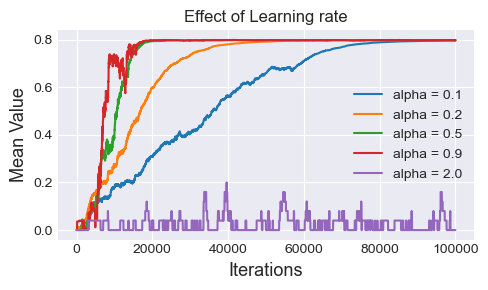

In [63]:
fig, ax = plt.subplots(figsize=(5,3))

for i,alpha in enumerate(alphas):
    plt.plot(Iterations,mean_values[i],label="alpha = {}".format(alpha))

plt.legend()

plt.title("Effect of Learning rate")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"q_apha.pdf")

In [83]:
gamma = 0.9999
alphas_decays = [0.999,0.9999,0.99999,1.0]
mean_values = []
for decay in tqdm(alphas_decays):
    ql = QLearning(trans, rewards, gamma,n_iter=100_000,alpha =0.5,alpha_decay=decay)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]
    
Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 4/4 [00:45<00:00, 11.36s/it]


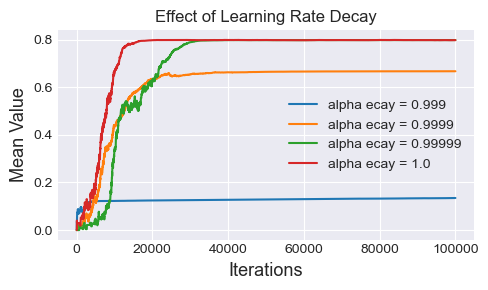

In [86]:
fig, ax = plt.subplots(figsize=(5,3))
for i,decay in enumerate(alphas_decays):
    plt.plot(Iterations,mean_values[i],label="alpha ecay = {}".format(decay))

plt.legend()
plt.title("Effect of Learning Rate Decay")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"q_apha_decay.pdf")

In [102]:
gamma = 0.9999
eps_decays = [0.8,0.9,0.99,0.999,1.0]
mean_values = []
for decay in tqdm(eps_decays):
    ql = QLearning(trans, rewards, gamma,n_iter=40_000,alpha =0.5,alpha_decay=1.,epsilon_decay=decay)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]

Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 5/5 [00:21<00:00,  4.39s/it]


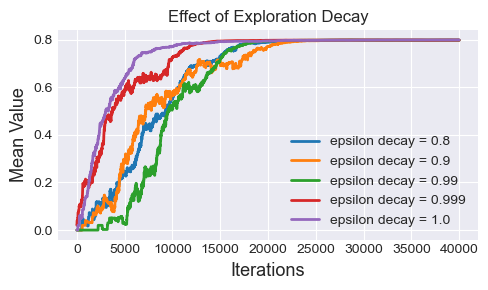

In [103]:
fig, ax = plt.subplots(figsize=(5,3))

for i,decay in enumerate(eps_decays):
    plt.plot(Iterations,mean_values[i],label="epsilon decay = {}".format(decay),linewidth=2)

plt.legend()
plt.title("Effect of Exploration Decay")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"q_epsilon.pdf")

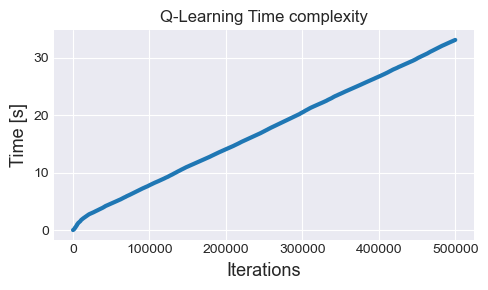

In [116]:
ql = QLearning(trans, rewards, gamma,n_iter=500_000)
ql.run()
time = [stats["Time"] for stats in ql.run_stats]     
Iterations = [stats["Iteration"] for stats in ql.run_stats]
fig, ax = plt.subplots(figsize=(5,3))

plt.plot(Iterations,time,linewidth=3)
plt.title("Q-Learning Time complexity")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Time [s]",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"q_time.pdf")


In [106]:
# qlstats = []

# gamma = 0.99
# n_iterations = [10_000,100_000,1_000_000,5_000_000]
# size = np.sqrt(fl_env.observation_space.n)
# for iter in tqdm(n_iterations):
#     ql = QLearning(trans, rewards, gamma, n_iter=iter,epsilon_decay= 0.99,alpha_decay=1.0)
#     ql.run()
#     time = ql.time
#     meanV = np.mean(ql.V)  
#     qlstats.append(['Q', size, iter, time, meanV])

In [107]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,4))
# dfql = pd.DataFrame(qlstats, columns=['Type', 'Size', 'n_iterations',  'Time', 'MeanV'])

# sns.lineplot(x=dfql['n_iterations'], y=dfql['Time'], label = "QLearning", ax=axs[0], alpha=0.5, color='blue',marker='o')
# axs[0].set_title('Time vs  # Iterations')

# sns.lineplot(x=dfql['n_iterations'], y=dfql['MeanV'], label = "QLearning", ax=axs[1], alpha=0.5, color='blue',marker='o')
# axs[1].set_title('Mean Value vs # Iterations [log]')
# axs[1].set(xscale="log")
# for ax in axs.flat:
    
#     ax.legend(loc='best')
#     ax.grid()
#     ax.set_facecolor("snow")
    
# fig.tight_layout()
# fig.savefig(save_folder+"Q_iter.pdf")

In [108]:
# qlstats_eps_decay = []

# gamma = 0.99
# epsilons_decay = [0.8,0.85,0.9,0.95,0.99,1.0]
# size = np.sqrt(fl_env.observation_space.n)
# for decay in tqdm(epsilons_decay):
#     ql = QLearning(trans, rewards, gamma, n_iter=1_000_000,epsilon_decay= decay,alpha_decay=1.0)
#     ql.run()
#     meanV = np.mean(ql.V)  
#     qlstats_eps_decay.append(['Q', size, decay, time, meanV])




In [109]:
# fig, axs = plt.subplots(nrows=1, figsize=(6,4))
# dfql = pd.DataFrame(qlstats, columns=['Type', 'Size', 'epsilon decay',  'Time', 'MeanV'])

# # sns.lineplot(x=dfql['epsilon decay'], y=dfql['Time'], label = "QLearning", ax=axs[0], alpha=0.5, color='blue',marker='o')
# # axs[0].set_title('Time vs  epsilon decay')

# sns.lineplot(x=dfql['epsilon decay'], y=dfql['MeanV'], label = "QLearning", ax=axs, alpha=0.5, color='blue',marker='o')
# axs.set_title('Mean Value vs epsilon decay')

# # for ax in axs.flat:
# axs.legend(loc='best')
# axs.grid()
# axs.set_facecolor("snow")
    
# fig.tight_layout()

In [110]:
# qlstats_alpha_decay = []

# gamma = 0.99
# alpha_decay = [0.95,0.97,0.99,1.0]
# size = np.sqrt(fl_env.observation_space.n)
# for decay in tqdm(alpha_decay):
#     ql = QLearning(trans, rewards, gamma, n_iter=1_000_000,epsilon_decay= 0.99,alpha = 0.1 , alpha_decay=decay)
#     ql.run()
#     time = ql.time
#     meanV = np.mean(ql.V)  
#     qlstats_alpha_decay.append(['Q', size, decay, time, meanV])




In [111]:
# fig, axs = plt.subplots(nrows=1, figsize=(6,4))
# dfql = pd.DataFrame(qlstats, columns=['Type', 'Size', 'learning rate decay',  'Time', 'MeanV'])

# # sns.lineplot(x=dfql['epsilon decay'], y=dfql['Time'], label = "QLearning", ax=axs[0], alpha=0.5, color='blue',marker='o')
# # axs[0].set_title('Time vs  epsilon decay')

# sns.lineplot(x=dfql['learning rate decay'], y=dfql['MeanV'], label = "QLearning", ax=axs, alpha=0.5, color='blue',marker='o')
# axs.set_title('Mean Value vs learning rate decay')


# axs.legend(loc='best')
# axs.grid()
# axs.set_facecolor("snow")
    
# fig.tight_layout()

In [112]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,4))
# dfql_eps = pd.DataFrame(qlstats_eps_decay, columns=['Type', 'Size', 'epsilon decay',  'Time', 'MeanV'])
# dfql_alpha = pd.DataFrame(qlstats_alpha_decay, columns=['Type', 'Size', 'learning rate decay',  'Time', 'MeanV'])

# sns.lineplot(x=dfql_eps['epsilon decay'], y=dfql_eps['MeanV'], label = "QLearning", ax=axs[0], alpha=0.5, color='blue',marker='o')
# axs[0].set_title('Time vs epsilon decay')

# sns.lineplot(x=dfql_alpha['learning rate decay'], y=dfql_alpha['MeanV'], label = "QLearning", ax=axs[1], alpha=0.5, color='blue',marker='o')
# axs[1].set_title('Mean Value vs learning rate decay')
# # axs[1].set(xscale="log")
# for ax in axs.flat:
    
#     ax.legend(loc='best')
#     ax.grid()
#     ax.set_facecolor("snow")
    
# fig.tight_layout()
# fig.savefig(save_folder+"Q_decay.pdf")

# Evaluatoins 

In [96]:
def run_episode(env, policy, gamma, render=True,verbose=True):
    state, _ = env.reset()
    total_reward = 0
    step_idx = 0
    success = 0
    while True:
        if render:
            env.render()
        state, reward, terminated, truncated,_ = env.step(int(policy[state]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if terminated or truncated :
            if terminated:
                success =1
            if truncated:
                if verbose:
                    print("went into the hole")
            break
    return total_reward, step_idx, success

In [97]:
def evaluate_policy(env, policy, gamma, n=500):
    result = [run_episode(env, policy, gamma, False,False) for _ in range(n)]
    result = np.array(result)
    return np.mean(result[:,0]),np.mean(result[:,1]), np.sum(result[:,2])/n

In [76]:
gamma = 0.9999
vi = ValueIteration(trans, rewards, gamma)
vi.run()
vi_time = vi.time
print("VI mean V: ", vi.run_stats[-1]["Mean V"])
print("number of iteration: ",vi.iter)
print("time: ",vi.time)
pi = PolicyIteration(trans, rewards, gamma)
pi.run()
pi_time = pi.time
print("PI mean V: ", pi.run_stats[-1]["Mean V"])
print("number of iteration: ",pi.iter)
print("time: ",pi.time)

ql = QLearning(trans, rewards, gamma, n_iter=20_000,epsilon_decay= 1.0,alpha = 0.5 , alpha_decay=1.0)
ql.run()
qi_time = ql.time
print("Q mean V: ", ql.run_stats[-1]["Mean V"])
print("time: ",ql.time)

VI mean V:  0.7978686385003054
number of iteration:  275
time:  0.022542238235473633
PI mean V:  0.7978822443030882
number of iteration:  6
time:  0.006201028823852539
Q mean V:  0.7942797843313935
time:  1.488063097000122


In [275]:
# run_episode(fl_env_human,vi.policy,gamma=gamma)

In [68]:
def visualize_policy(env_image,map_,policy,values):
    h,w,_ = env_image.shape
    image_copy = np.copy(env_image)
    horizontal_boxes_width= w//len(map_[0])
    vertical_boxes_height = h//len(map_)
    hole_counter = 1
    center_offset_width = horizontal_boxes_width//2
    center_offset_height = vertical_boxes_height//2
    policy = np.array(policy).reshape(5,5)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            a= policy[j][i]
            print()
            if map_[j][i] == 'G' or map_[j][i] == 'H':
                if  map_[j][i] == 'H':
                    font = cv2.FONT_HERSHEY_SIMPLEX
            
                    # org
                    org = (i*horizontal_boxes_width+center_offset_width-8, j*vertical_boxes_height+center_offset_height+8)
                    
                    # fontScale
                    fontScale = 0.6
                    
                    # Blue color in BGR
                    color = (255,0, 0)
                    
                    # Line thickness of 2 px
                    thickness = 1
                    
                    # Using cv2.putText() method
                    image_copy = cv2.putText(image_copy, "{}".format(hole_counter), org, font, 
                                    fontScale, color, thickness, cv2.LINE_AA)

                    hole_counter +=1
                continue

            if a==0: ##left
                start_point = (i*horizontal_boxes_width+int(1.5*center_offset_width), j*vertical_boxes_height+center_offset_height)
                end_point = (i*horizontal_boxes_width+int(0.5*center_offset_width),j*vertical_boxes_height+center_offset_height)
            elif a==1:#down
                start_point = (i*horizontal_boxes_width+center_offset_width, j*vertical_boxes_height+int(0.3*center_offset_height))
                end_point = (i*horizontal_boxes_width+center_offset_width,j*vertical_boxes_height+int(1.3*center_offset_height))
            elif a==2:#right
                start_point = (i*horizontal_boxes_width+int(0.5*center_offset_width), j*vertical_boxes_height+center_offset_height)
                end_point = (i*horizontal_boxes_width+int(1.5*center_offset_width),j*vertical_boxes_height+center_offset_height)
            elif a==3:#up
                start_point = (i*horizontal_boxes_width+center_offset_width, j*vertical_boxes_height+int(1.3*center_offset_height))
                end_point = (i*horizontal_boxes_width+center_offset_width,j*vertical_boxes_height+int(0.3*center_offset_height))


            # color in BGR
            color = (0, 0, 0)
            
            # Line thickness of 9 px
            thickness = 1

            image_copy = cv2.arrowedLine(image_copy, start_point, end_point,
                                                color, thickness,tipLength = 0.3)

            #write text 
            # font
            font = cv2.FONT_HERSHEY_SIMPLEX
            
            # org
            org = (i*horizontal_boxes_width+10, j*vertical_boxes_height+int(1.8*center_offset_height))
            
            # fontScale
            fontScale = 0.5
            
            # Blue color in BGR
            color = (0,0, 0)
            
            # Line thickness of 2 px
            thickness = 1
            
            # Using cv2.putText() method
            image_copy = cv2.putText(image_copy, "{:.4f}".format(values[j][i]), org, font, 
                            fontScale, color, thickness, cv2.LINE_AA)

    return image_copy



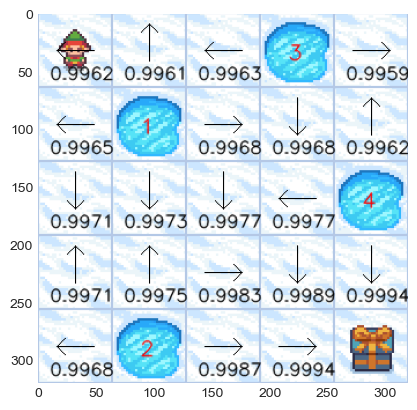

In [73]:
policy = vi.policy
policy = np.array(policy).reshape(len(map_),len(map_[0]))


values = vi.V
values = np.array(values).reshape(len(map_),len(map_[0]))

image = visualize_policy(fl_image,map_,policy,values)
plt.imshow(image)
plt.grid()
plt.imsave(save_folder+"V_policy.png",image)

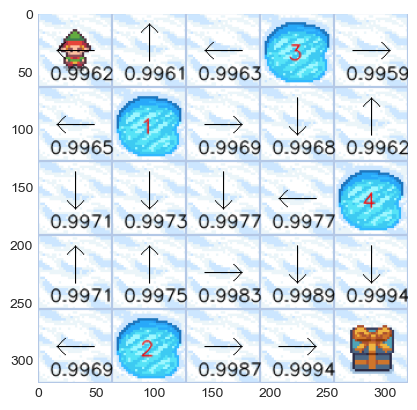

In [72]:
policy = pi.policy
policy = np.array(policy).reshape(len(map_),len(map_[0]))


values = pi.V
values = np.array(values).reshape(len(map_),len(map_[0]))

image_pi = visualize_policy(fl_image,map_,policy,values)
plt.imshow(image_pi)
plt.grid()
plt.imsave(save_folder+"Pi_policy.png",image)

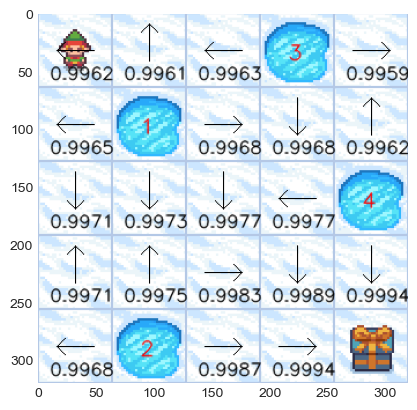

In [74]:
policy = ql.policy
policy = np.array(policy).reshape(len(map_),len(map_[0]))


values = ql.V
values = np.array(values).reshape(len(map_),len(map_[0]))

image_ql = visualize_policy(fl_image,map_,policy,values)
plt.imshow(image)
plt.grid()
plt.imsave(save_folder+"ql_policy.png",image)

# Large grid

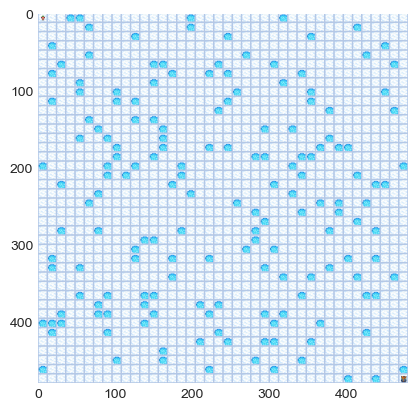

In [78]:
np.random.seed(0)
rmap = generate_random_map(size=40, p=0.9)
env = gym.make("FrozenLake-v1", desc=rmap, is_slippery = True,render_mode="rgb_array")
env.reset()

large_grid_image = env.render()

plt.imshow(large_grid_image[:-32,:-32,:])
plt.grid()#use this if you config plt to plot like seaborn
plt.imsave(save_folder+"large_grid.png",large_grid_image[:-32,:-32,:])



In [79]:
states = env.observation_space.n
actions = env.action_space.n

trans = np.zeros((actions, states, states))
rewards = np.zeros((actions, states,states))
for state in range(states):
    for action in range(actions):
        for result in env.env.P[state][action]:
            next_state = result[1]
            prob = result[0]
            reward = result[2]
            trans[action][state][next_state] += prob
            rewards[action][state][next_state] = reward


In [83]:
gamma = 0.99
vi = ValueIteration(trans, rewards, gamma,max_iter=500)
vi.run()
time = vi.time
meanV = np.mean(vi.V)    
iters = vi.iter

pi = PolicyIteration(trans, rewards, gamma,max_iter=500)
pi.run()
pi_time = pi.time

vi_mean_v = [stats["Mean V"] for stats in vi.run_stats]
vi_dQ = [stats["Error"] for stats in vi.run_stats]
vi_rewards_stats = [stats["Reward"] for stats in vi.run_stats]
vi_Iterations = [stats["Iteration"] for stats in vi.run_stats]
vi_time = [stats["Time"] for stats in vi.run_stats]

pi_mean_v = [stats["Mean V"] for stats in pi.run_stats]
pi_dQ = [stats["Error"] for stats in pi.run_stats]
pi_rewards_stats = [stats["Reward"] for stats in pi.run_stats]
pi_Iterations = [stats["Iteration"] for stats in pi.run_stats]
pi_time = [stats["Time"] for stats in pi.run_stats]

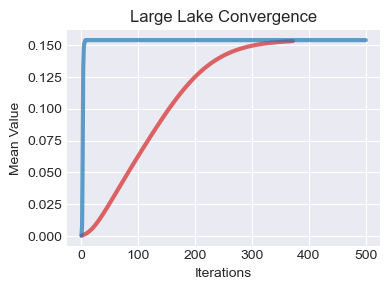

In [85]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(vi_Iterations,vi_mean_v,label="VI",color='tab:red',linewidth=3, alpha=0.7)
plt.plot(pi_Iterations,pi_mean_v,label="PI",color='tab:blue', linewidth=3, alpha=0.7)
plt.title("Large Lake Convergence")
plt.xlabel("Iterations")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.savefig(save_folder+"vi_pi_large_converence.pdf")



In [86]:
gamma = 0.99
eps_decays = [0.999,0.9999,0.99999,1.0]
mean_values = []
for decay in tqdm(eps_decays):
    ql = QLearning(trans, rewards, gamma,n_iter=50_000,alpha =0.5,alpha_decay=1.,epsilon_decay=decay)
    ql.run()

    mean_v = [stats["Mean V"] for stats in ql.run_stats]
    mean_values.append(mean_v)
    # dQ = [stats["Error"] for stats in ql.run_stats]
    # rewards_stats = [stats["Reward"] for stats in ql.run_stats]
    # Iterations = [stats["Iteration"] for stats in ql.run_stats]
    # time = [stats["Time"] for stats in ql.run_stats]

Iterations = [stats["Iteration"] for stats in ql.run_stats]

100%|██████████| 4/4 [02:26<00:00, 36.64s/it]


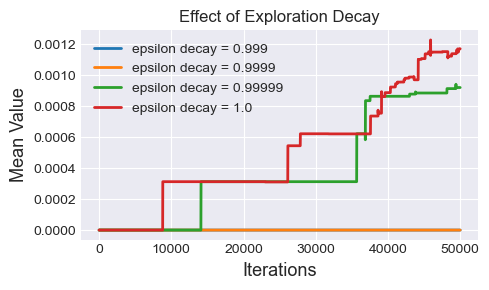

In [88]:
fig, ax = plt.subplots(figsize=(5,3))

for i,decay in enumerate(eps_decays):
    plt.plot(Iterations,mean_values[i],label="epsilon decay = {}".format(decay),linewidth=2)

plt.legend()
plt.title("Effect of Exploration Decay")
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Mean Value",fontsize=13)
plt.tight_layout()
plt.savefig(save_folder+"q_large_epsilon.pdf")

In [103]:
np.random.seed(0)
gamma = 0.99
vi = ValueIteration(trans, rewards, gamma)
vi.run()
vi_time = vi.time
print("VI mean V: ", vi.run_stats[-1]["Mean V"])
print("number of iteration: ",vi.iter)
print("time: ",vi.time)
pi = PolicyIterationModified(trans, rewards, gamma)
pi.run()
pi_time = pi.time
print("PI mean V: ", np.mean(pi.V))
print("number of iteration: ",pi.iter)
print("time: ",pi.time)

ql = QLearning(trans, rewards, gamma, n_iter=50_000,epsilon_decay= 1.0,alpha = 0.5 , alpha_decay=1.0)
ql.run()
qi_time = ql.time
print("Q mean V: ", ql.run_stats[-1]["Mean V"])
print("time: ",ql.time)

VI mean V:  0.1531871892330753
number of iteration:  372
time:  3.2187631130218506
PI mean V:  0.15387487794222343
number of iteration:  49
time:  2.2824089527130127


KeyboardInterrupt: 

In [89]:
ql = QLearning(trans, rewards, gamma, n_iter=5_000_000,epsilon_decay= 1.0,alpha = 0.5 , alpha_decay=1.0)
ql.run()
qi_time = ql.time
print("Q mean V: ", ql.run_stats[-1]["Mean V"])
print("time: ",ql.time)

Q mean V:  0.37334297174929154
time:  3152.484752893448


False

In [90]:
mean_v = [stats["Mean V"] for stats in ql.run_stats]


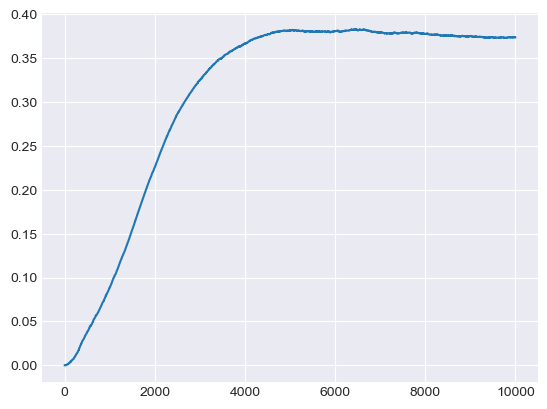

In [93]:
plt.plot(mean_v)